In [16]:
pip install GEOparse

In [18]:
import GEOparse
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Download and Load the Dataset
gse = GEOparse.get_GEO("GSE10072", destdir=".")

# Extract expression data and sample information
expression_data = gse.pivot_samples('VALUE')  # Gene expression matrix
sample_data = gse.phenotype_data  # Metadata for samples

# Step 2: Preprocess the Data
# Clean expression data (remove NaN values)
expression_data = expression_data.dropna()


19-Dec-2024 13:56:58 DEBUG utils - Directory . already exists. Skipping.
DEBUG:GEOparse:Directory . already exists. Skipping.
19-Dec-2024 13:56:58 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
19-Dec-2024 13:56:58 INFO GEOparse - Parsing ./GSE10072_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE10072_family.soft.gz: 
19-Dec-2024 13:56:58 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
19-Dec-2024 13:56:58 DEBUG GEOparse - SERIES: GSE10072
DEBUG:GEOparse:SERIES: GSE10072
19-Dec-2024 13:56:58 DEBUG GEOparse - PLATFORM: GPL96
DEBUG:GEOparse:PLATFORM: GPL96
19-Dec-2024 13:56:59 DEBUG GEOparse - SAMPLE: GSM254625
DEBUG:GEOparse:SAMPLE: GSM254625
19-Dec-2024 13:56:59 DEBUG GEOparse - SAMPLE: GSM254626
DEBUG:GEOparse:SAMPLE: GSM254626
19-Dec-2024 13:56:59 DEBUG GEOparse - SAMPLE: GSM254627
DEBUG:GEOparse:SAMPLE: GSM254627
19-Dec-2024 13:56:59 DEBUG GEOparse - SAMPLE: GSM254628
DEBUG:GEOparse:SAMPLE: GSM254628

In [27]:
sample_data.head()

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,relation,series_id,data_row_count,characteristics_ch1.3.Stage:IB,characteristics_ch1.3.Stage:IIA,characteristics_ch1.3.Stage:IIIA,characteristics_ch1.3.Stage:IIIB,characteristics_ch1.3.Stage:IV,characteristics_ch1.3.Stage:IA,target
GSM254625,Lung Tumor_GT00006,GSM254625,Public on Feb 20 2008,Jan 04 2008,Aug 18 2014,RNA,1,Adenocarcinoma of the Lung,Homo sapiens,9606,...,Reanalyzed by: GSE60486,GSE10072,22283,NaN,NaN,NaN,NaN,NaN,NaN,1
GSM254626,Normal Lung_GT00006,GSM254626,Public on Feb 20 2008,Jan 04 2008,Aug 18 2014,RNA,1,Normal Lung Tissue,Homo sapiens,9606,...,Reanalyzed by: GSE60486,GSE10072,22283,NaN,NaN,NaN,NaN,NaN,NaN,0
GSM254627,Lung Tumor_GT00007,GSM254627,Public on Feb 20 2008,Jan 04 2008,Aug 18 2014,RNA,1,Adenocarcinoma of the Lung,Homo sapiens,9606,...,Reanalyzed by: GSE60486,GSE10072,22283,NaN,NaN,NaN,NaN,NaN,NaN,1
GSM254628,Normal Lung_GT00007,GSM254628,Public on Feb 20 2008,Jan 04 2008,Aug 18 2014,RNA,1,Normal Lung Tissue,Homo sapiens,9606,...,Reanalyzed by: GSE60486,GSE10072,22283,NaN,NaN,NaN,NaN,NaN,NaN,0
GSM254629,Lung Tumor_GT00022,GSM254629,Public on Feb 20 2008,Jan 04 2008,Aug 18 2014,RNA,1,Adenocarcinoma of the Lung,Homo sapiens,9606,...,Reanalyzed by: GSE60486,GSE10072,22283,,NaN,NaN,NaN,NaN,NaN,1


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



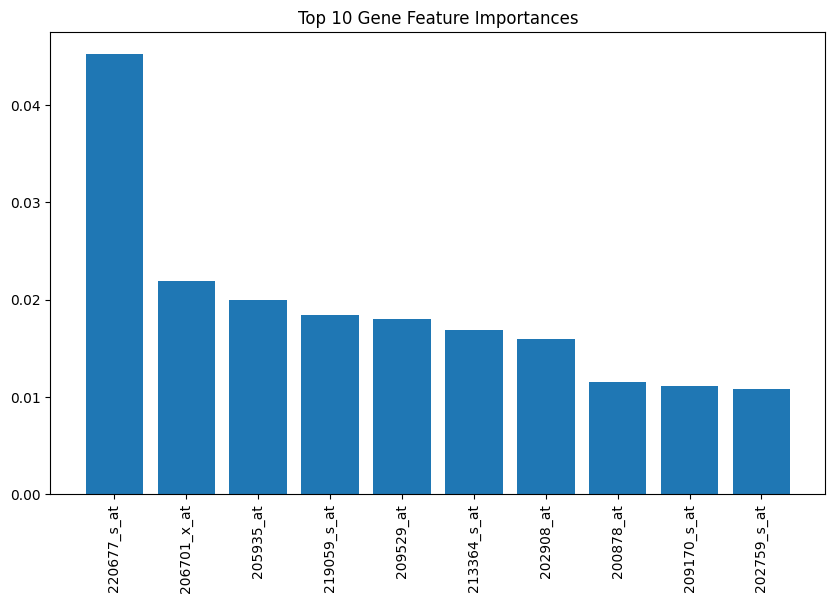

In [22]:
# Extract target labels from the 'source_name_ch1' column
sample_data['target'] = sample_data['source_name_ch1'].apply(
    lambda x: 1 if 'Adenocarcinoma of the Lung' in str(x) else 0
)

# Ensure alignment between expression data and sample metadata
common_samples = expression_data.columns.intersection(sample_data.index)
expression_data = expression_data[common_samples]
sample_data = sample_data.loc[common_samples]

# Step 3: Prepare the Dataset for Machine Learning
X = expression_data.T  # Features (gene expression levels)
y = sample_data['target'].astype(int)  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Train a Machine Learning Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the trained model for future use
import joblib
joblib.dump(clf, "cancer_gene_classifier.pkl")

# Optional: Feature Importance
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importances[indices], align="center")
plt.xticks(range(10), [X.columns[i] for i in indices], rotation=90)
plt.title("Top 10 Gene Feature Importances")
plt.show()
